In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv


In [2]:
# Step 1: Import Libraries and Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv")

# Display the first 5 rows
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


Performing Exploratory Data Analysis (EDA)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         

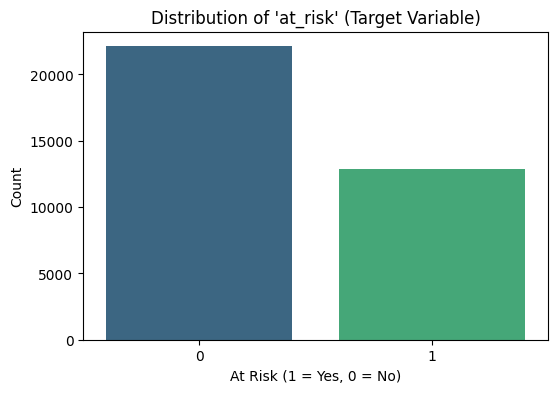

In [3]:
# Step 3: Exploratory Data Analysis (EDA)
# Check dataset info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Distribution of the target variable 'at_risk'
plt.figure(figsize=(6, 4))
sns.countplot(x='at_risk', data=df, palette='viridis')
plt.title("Distribution of 'at_risk' (Target Variable)")
plt.xlabel("At Risk (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

Vizualizing age distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


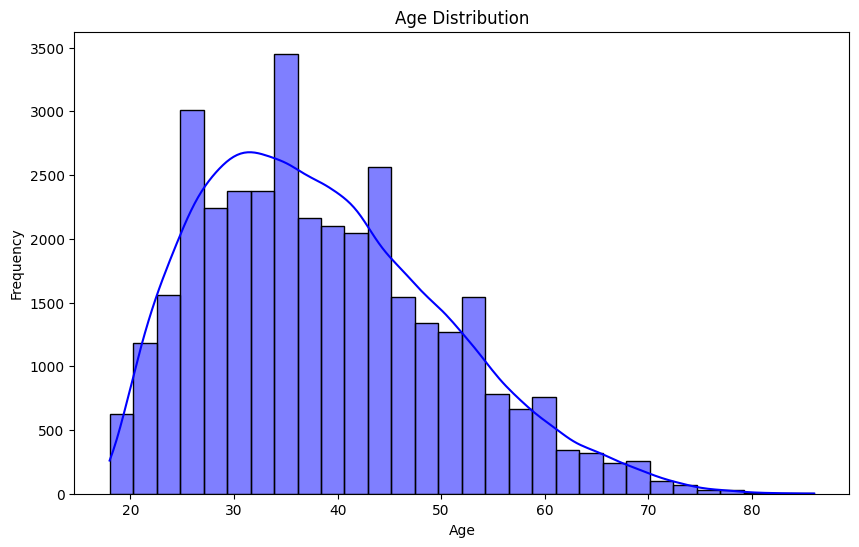

In [4]:
# Step 4: Visualize Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Correlation analysis

In [5]:
# Encode categorical variables (e.g., 'gender')
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Display the first 5 rows of the encoded dataset
df_encoded.head()

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk,gender_Male
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0,True
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1,True
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1,False
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0,True
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1,True


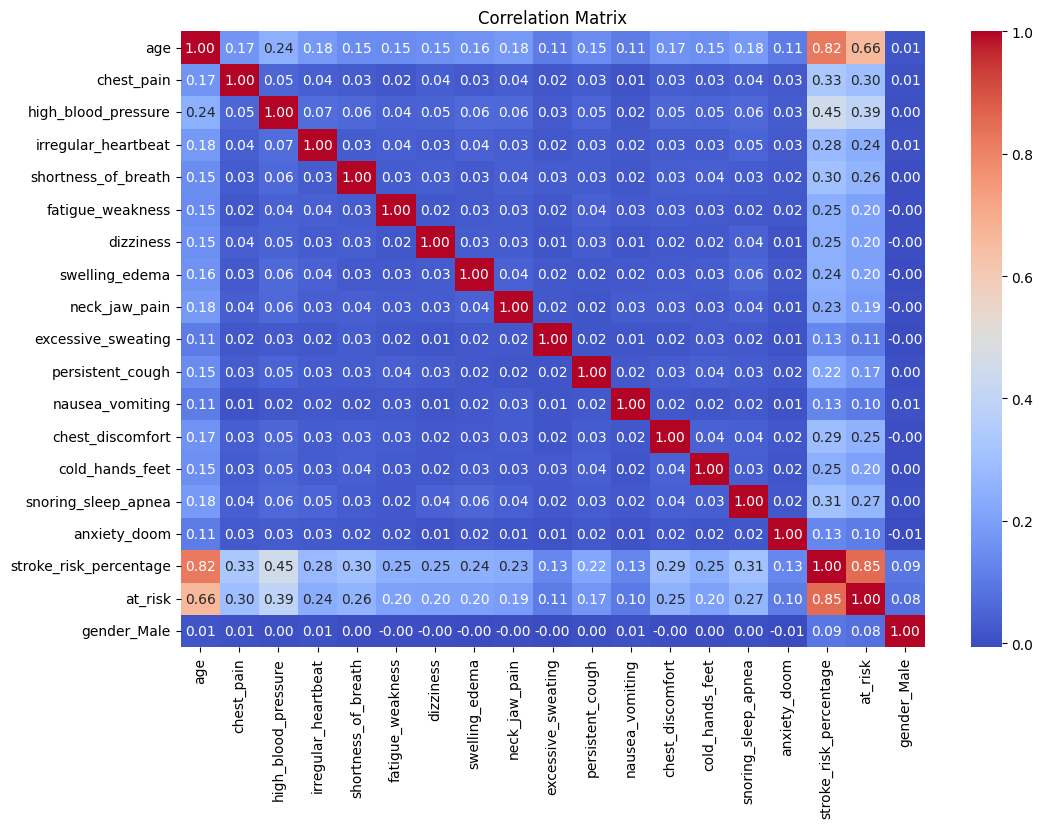

In [6]:

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Preparing data for modelling

In [7]:

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['at_risk', 'stroke_risk_percentage'])  # Features
y_classification = df['at_risk']  # Target for classification
y_regression = df['stroke_risk_percentage']  # Target for regression

# Encode categorical variables (if any)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (28000, 17)
Testing set shape: (7000, 17)


Training a classification Model

In [8]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9734285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4467
           1       0.99      0.94      0.96      2533

    accuracy                           0.97      7000
   macro avg       0.98      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



To get the prediction probabilities

Prediction Results:
       Actual  Predicted  Probability of Not At Risk (%)  \
17813       1          1                             0.0   
6857        0          0                           100.0   
7672        1          1                             0.0   
9704        1          1                             0.0   
14303       0          0                           100.0   
26304       1          1                             0.0   
3202        0          0                           100.0   
27310       0          0                            86.0   
11215       0          0                            95.0   
20490       0          0                           100.0   

       Probability of At Risk (%)  
17813                       100.0  
6857                          0.0  
7672                        100.0  
9704                        100.0  
14303                         0.0  
26304                       100.0  
3202                          0.0  
27310                        14

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


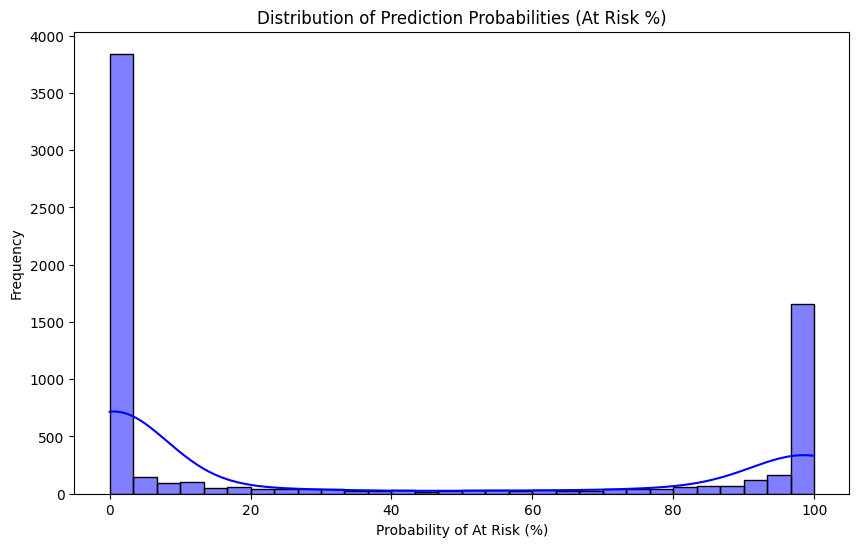

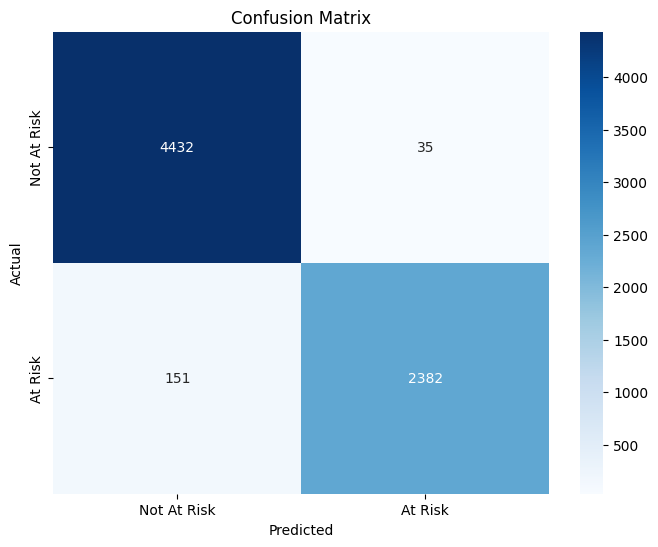

In [9]:

y_pred_proba = model.predict_proba(X_test)
y_pred_proba_percent = y_pred_proba * 100

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability of Not At Risk (%)': y_pred_proba_percent[:, 0],
    'Probability of At Risk (%)': y_pred_proba_percent[:, 1]
})

# Display the first 10 rows
print("Prediction Results:")
print(results_df.head(10))

# Visualize Prediction Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Probability of At Risk (%)'], bins=30, kde=True, color='blue')
plt.title("Distribution of Prediction Probabilities (At Risk %)")
plt.xlabel("Probability of At Risk (%)")
plt.ylabel("Frequency")
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not At Risk', 'At Risk'], 
            yticklabels=['Not At Risk', 'At Risk'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Testing the trained model with a patient's information

In [10]:
# New patient data
new_patient = {
    'age': 65,  # Age of the patient
    'gender': 'Male',  # Gender of the patient
    'chest_pain': 1,  # 1 = Present, 0 = Absent
    'shortness_of_breath': 1,
    'irregular_heartbeat': 0,
    'fatigue_weakness': 1,
    'dizziness': 0,
    'swelling_edema': 1,
    'neck_jaw_pain': 0,
    'excessive_sweating': 0,
    'persistent_cough': 1,
    'nausea_vomiting': 0,
    'high_blood_pressure': 1,
    'chest_discomfort': 1,
    'cold_hands_feet': 1,
    'snoring_sleep_apnea': 1,
    'anxiety_doom': 0
}

In [11]:
# Converting the data to DataFrame
new_patient_df = pd.DataFrame([new_patient])

print("New Patient Data:")
print(new_patient_df)

New Patient Data:
   age gender  chest_pain  shortness_of_breath  irregular_heartbeat  \
0   65   Male           1                    1                    0   

   fatigue_weakness  dizziness  swelling_edema  neck_jaw_pain  \
0                 1          0               1              0   

   excessive_sweating  persistent_cough  nausea_vomiting  high_blood_pressure  \
0                   0                 1                0                    1   

   chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  
0                 1                1                    1             0  


In [12]:
# Encoding categorical variables (e.g., 'gender')
new_patient_encoded = pd.get_dummies(new_patient_df, columns=['gender'], drop_first=True)

# Ensuring all columns match the training data
# We need to add missing columns (if any) and set them to 0
for col in X_train.columns:
    if col not in new_patient_encoded.columns:
        new_patient_encoded[col] = 0

# Reordering columns to match the training data
new_patient_encoded = new_patient_encoded[X_train.columns]

# Displaying the encoded data
print("Encoded New Patient Data:")
print(new_patient_encoded)

Encoded New Patient Data:
   age  chest_pain  high_blood_pressure  irregular_heartbeat  \
0   65           1                    1                    0   

   shortness_of_breath  fatigue_weakness  dizziness  swelling_edema  \
0                    1                 1          0               1   

   neck_jaw_pain  excessive_sweating  persistent_cough  nausea_vomiting  \
0              0                   0                 1                0   

   chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  \
0                 1                1                    1             0   

   gender_Male  
0            0  


In [13]:
# Predicting the class (0 = Not At Risk, 1 = At Risk)
predicted_class = model.predict(new_patient_encoded)

# Predicting the probabilities
predicted_proba = model.predict_proba(new_patient_encoded)

# Converting probabilities to percentages
predicted_proba_percent = predicted_proba * 100

print("\nPrediction Results:")
print(f"Predicted Class: {'At Risk' if predicted_class[0] == 1 else 'Not At Risk'}")
print(f"Probability of Not At Risk: {predicted_proba_percent[0][0]:.2f}%")
print(f"Probability of At Risk: {predicted_proba_percent[0][1]:.2f}%")


Prediction Results:
Predicted Class: At Risk
Probability of Not At Risk: 0.00%
Probability of At Risk: 100.00%


Saving the weights of the model

In [14]:
import pickle

# Saving the model to a file
with open('stroke_risk_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'stroke_risk_model.pkl'")

Model saved as 'stroke_risk_model.pkl'


In [15]:
# Load the model
with open('stroke_risk_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make a prediction with the loaded model
loaded_prediction = loaded_model.predict(new_patient_encoded)
print("Prediction from loaded model:", loaded_prediction)

Prediction from loaded model: [1]


Testing a new patient using the saved model

In [16]:
# New patient data
new_patient = {
    'age': 25,  # Age of the patient
    'gender': 'Male',  # Gender of the patient
    'chest_pain': 1,  # 1 = Present, 0 = Absent
    'shortness_of_breath': 1,
    'irregular_heartbeat': 0,
    'fatigue_weakness': 1,
    'dizziness': 0,
    'swelling_edema': 1,
    'neck_jaw_pain': 0,
    'excessive_sweating': 0,
    'persistent_cough': 1,
    'nausea_vomiting': 0,
    'high_blood_pressure': 1,
    'chest_discomfort': 1,
    'cold_hands_feet': 1,
    'snoring_sleep_apnea': 1,
    'anxiety_doom': 0
}

# Convert to DataFrame
new_patient_df = pd.DataFrame([new_patient])

# Encode categorical variables
new_patient_encoded = pd.get_dummies(new_patient_df, columns=['gender'], drop_first=True)

# Ensure all columns match the training data
for col in X_train.columns:
    if col not in new_patient_encoded.columns:
        new_patient_encoded[col] = 0

# Reorder columns to match the training data
new_patient_encoded = new_patient_encoded[X_train.columns]

# Load the model
with open('stroke_risk_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
predicted_class = loaded_model.predict(new_patient_encoded)
predicted_proba = loaded_model.predict_proba(new_patient_encoded)
predicted_proba_percent = predicted_proba * 100

# Display results
print("Prediction Results:")
print(f"Predicted Class: {'At Risk' if predicted_class[0] == 1 else 'Not At Risk'}")
print(f"Probability of Not At Risk: {predicted_proba_percent[0][0]:.2f}%")
print(f"Probability of At Risk: {predicted_proba_percent[0][1]:.2f}%")

Prediction Results:
Predicted Class: At Risk
Probability of Not At Risk: 12.00%
Probability of At Risk: 88.00%


Now, let's increase the age from 25 to 65, and we will see that, the stroke risk will be higher

In [17]:
# New patient data
new_patient = {
    'age': 65,  # Age of the patient
    'gender': 'Male',  # Gender of the patient
    'chest_pain': 1,  # 1 = Present, 0 = Absent
    'shortness_of_breath': 1,
    'irregular_heartbeat': 0,
    'fatigue_weakness': 1,
    'dizziness': 0,
    'swelling_edema': 1,
    'neck_jaw_pain': 0,
    'excessive_sweating': 0,
    'persistent_cough': 1,
    'nausea_vomiting': 0,
    'high_blood_pressure': 1,
    'chest_discomfort': 1,
    'cold_hands_feet': 1,
    'snoring_sleep_apnea': 1,
    'anxiety_doom': 0
}

# Convert to DataFrame
new_patient_df = pd.DataFrame([new_patient])

# Encode categorical variables
new_patient_encoded = pd.get_dummies(new_patient_df, columns=['gender'], drop_first=True)

# Ensure all columns match the training data
for col in X_train.columns:
    if col not in new_patient_encoded.columns:
        new_patient_encoded[col] = 0

# Reorder columns to match the training data
new_patient_encoded = new_patient_encoded[X_train.columns]

# Load the model
with open('stroke_risk_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
predicted_class = loaded_model.predict(new_patient_encoded)
predicted_proba = loaded_model.predict_proba(new_patient_encoded)
predicted_proba_percent = predicted_proba * 100

# Display results
print("Prediction Results:")
print(f"Predicted Class: {'At Risk' if predicted_class[0] == 1 else 'Not At Risk'}")
print(f"Probability of Not At Risk: {predicted_proba_percent[0][0]:.2f}%")
print(f"Probability of At Risk: {predicted_proba_percent[0][1]:.2f}%")

Prediction Results:
Predicted Class: At Risk
Probability of Not At Risk: 0.00%
Probability of At Risk: 100.00%


Coded by Mahatir Ahmed Tusher. Find the GitHub Repository from [here](https://github.com/Mahatir-Ahmed-Tusher/Stroke-Risk-Prediction-Dataset-based-on-Literature/tree/main) for deployment using flask or gradio.